
CUSTOMERS - Shape: (99441, 5)
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
Valores nulos:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicados:  0

ORDERS - Shape: (99441, 8)
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \

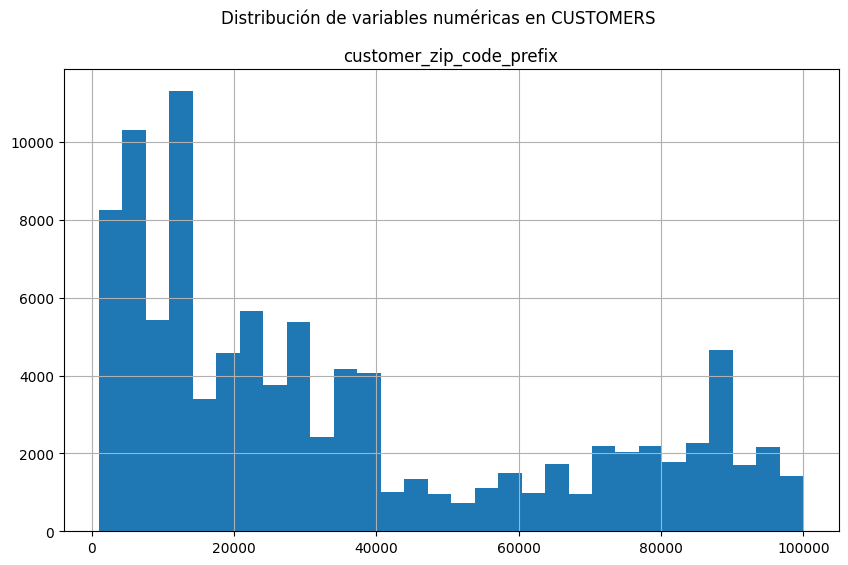

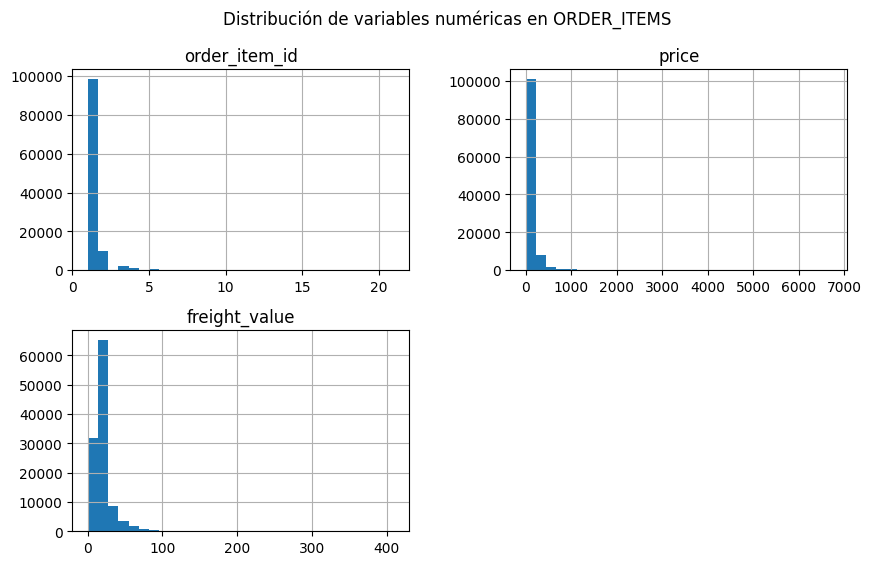

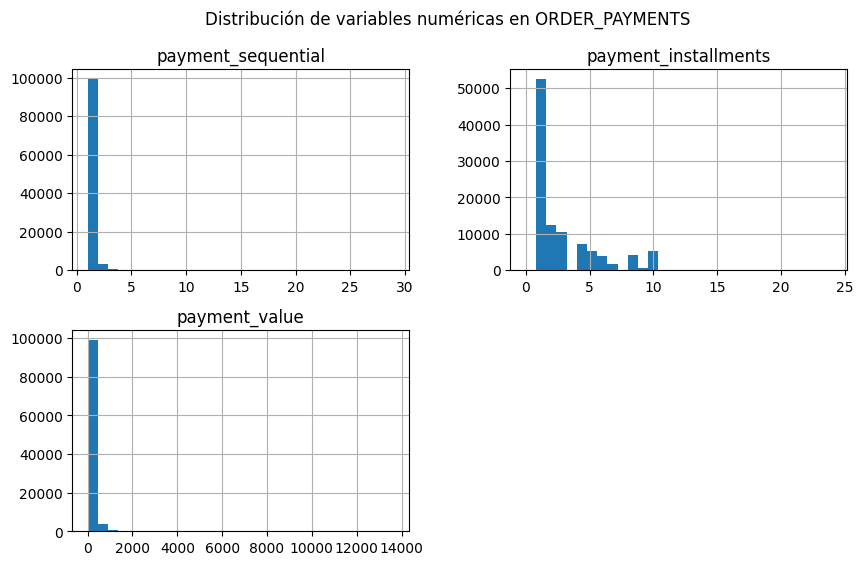

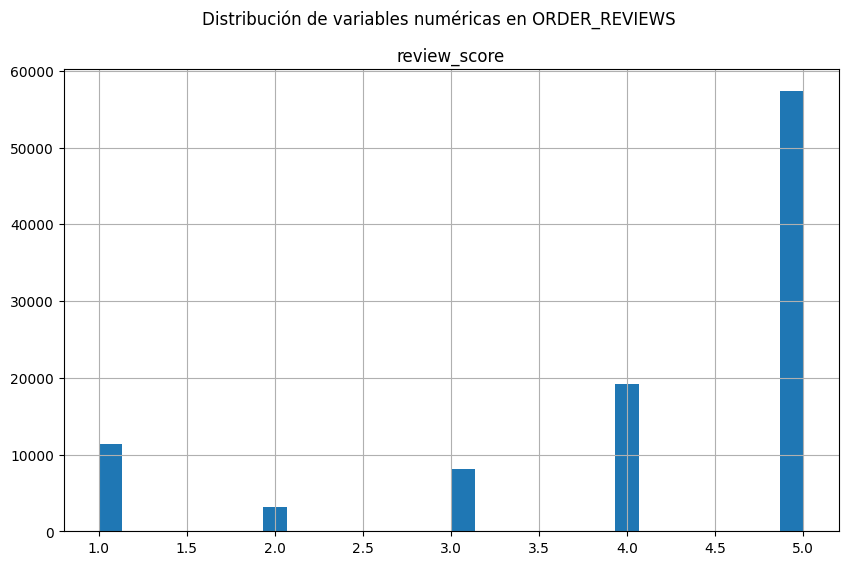

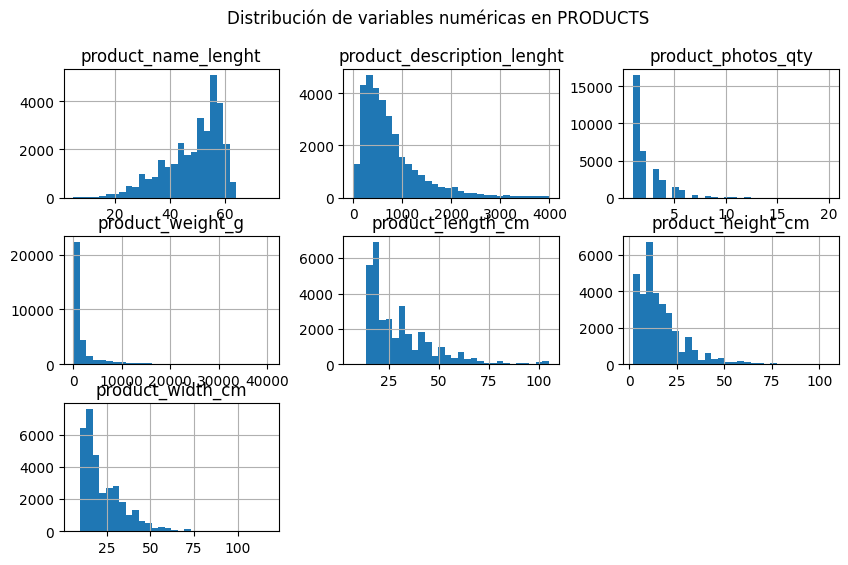

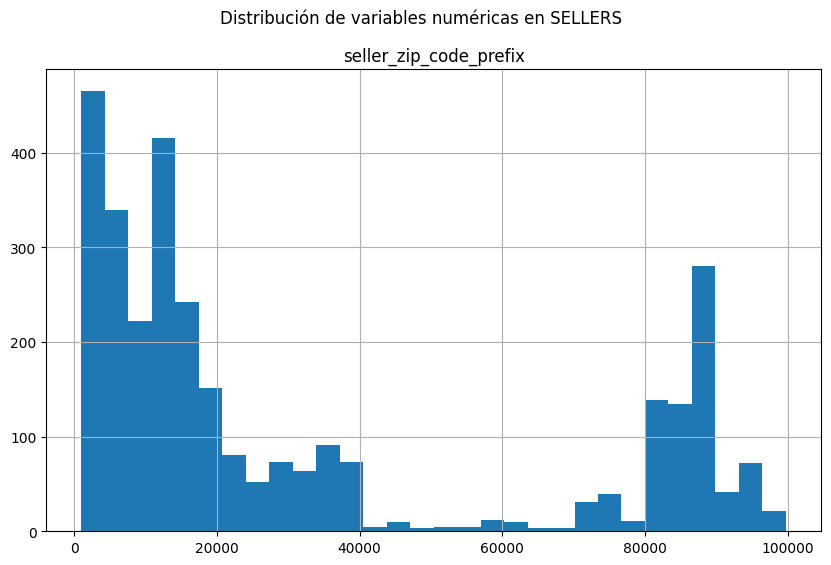

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "raw_data/"

def load_data():
    files = [f for f in os.listdir(data_path) if f.endswith(".csv")]
    datasets = {}
    for file in files:
        df_name = file.replace("olist_", "").replace("_dataset", "").replace(".csv", "")
        datasets[df_name] = pd.read_csv(os.path.join(data_path, file))
    return datasets

def explore_data(datasets):
    for name, df in datasets.items():
        print(f"\n{name.upper()} - Shape: {df.shape}")
        print(df.describe())
        print("Valores nulos:\n", df.isnull().sum())
        print("Duplicados: ", df.duplicated().sum())
        print("=" * 50)

def visualize_data(datasets):
    for name, df in datasets.items():
        numeric_cols = df.select_dtypes(include=['number']).columns
        if len(numeric_cols) > 0:
            df[numeric_cols].hist(figsize=(10, 6), bins=30)
            plt.suptitle(f"Distribución de variables numéricas en {name.upper()}")
            plt.show()

if __name__ == "__main__":
    datasets = load_data()
    explore_data(datasets)
    visualize_data(datasets)
